# Lecture: Complex Network Analysis

Prof. Dr. Michael Gertz

Winter Semester 2021/22

## Assignment 7 - Assortativity and Robustness

Students: Felix Hausberger, Nils Krehl, Patrick Günther

# 1. Build graph

In [71]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import scipy

In [2]:
df_blogs = pd.read_csv('assortativity_networks/blogs.txt', sep="\t", header=None)
df_javax = pd.read_csv('assortativity_networks/javax.txt', delim_whitespace=True, header=None)
df_network_science = pd.read_csv('assortativity_networks/network-science.txt', sep="\t", header=None)

In [3]:
df_blogs

,0,1
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
33425,975,664
33426,975,67
33427,975,1004
33428,975,1224


In [4]:
# since it is an undirected graph, no parallel edges are added
G_blogs = nx.Graph()
G_blogs.add_edges_from(df_blogs.itertuples(index=False))

G_javax = nx.Graph()
G_javax.add_edges_from(df_javax.itertuples(index=False))

G_network_science = nx.Graph()
G_network_science.add_edges_from(df_network_science.itertuples(index=False))

# remove self-loops
G_blogs.remove_edges_from(nx.selfloop_edges(G_blogs))
G_javax.remove_edges_from(nx.selfloop_edges(G_javax))
G_network_science.remove_edges_from(nx.selfloop_edges(G_network_science))

In [5]:
print(f"Number of nodes in blogs is {G_blogs.number_of_nodes()}.")
print(f"Number of edges in blogs is {G_blogs.number_of_edges()}.")
print()
print(f"Number of nodes in javax is {G_javax.number_of_nodes()}.")
print(f"Number of edges in javax is {G_javax.number_of_edges()}.")
print()
print(f"Number of nodes in network-science is {G_network_science.number_of_nodes()}.")
print(f"Number of edges in network-science is {G_network_science.number_of_edges()}.")

Number of nodes in blogs is 1224.
Number of edges in blogs is 16715.

Number of nodes in javax is 6120.
Number of edges in javax is 50290.

Number of nodes in network-science is 1461.
Number of edges in network-science is 2742.


# 2. Degree correlation matrix

In [44]:
def calculate_degree_correlation_matrix(G):
    max_degree = max(deg for n, deg in G.degree)
    # create a dict to save the number of degree combinations
    degrees = []
    for i in range(max_degree+1):
        for j in range(max_degree+1):
            degrees.append((i,j))

    deg_1 = []
    deg_2 = []
    for i in degrees:
        deg_1.append(i[0])
        deg_2.append(i[1])
    d = {'deg_1': deg_1, 'deg_2': deg_2, 'count': 0}
    degree_correlation_df = pd.DataFrame(data=d)

    for u,v,weight in G.edges(data=True):
        degree_correlation_df.loc[degree_correlation_df.eval(f'deg_1 == {G.degree(u)} & deg_2 == {G.degree(v)}'), 'count'] += 1
    
    deg_corr_mat = np.zeros((max_degree+1, max_degree+1))
    for index, row in degree_correlation_df.iterrows():
        deg_corr_mat[row['deg_1'], row['deg_2']] = row['count']

    deg_corr_mat = deg_corr_mat + deg_corr_mat.T
    deg_corr_mat_prob = deg_corr_mat / np.sum(deg_corr_mat)
    
    deg_corr_mat_absolute = deg_corr_mat
    
    return deg_corr_mat_absolute, deg_corr_mat_prob

In [7]:
deg_corr_mat_blogs_absolute, deg_corr_mat = calculate_degree_correlation_matrix(G_blogs)

In [45]:
deg_corr_mat_network_science_absolute, deg_corr_mat_network_science = calculate_degree_correlation_matrix(G_network_science)

In [9]:
# deg_corr_mat_javax_absolute, deg_corr_mat_javax = calculate_degree_correlation_matrix(G_javax)

# 3. Heatmap

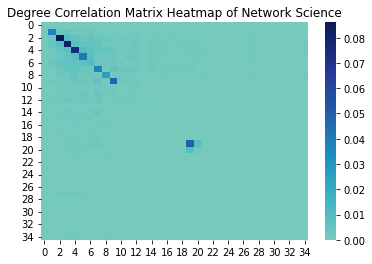

In [36]:
ax = sns.heatmap(deg_corr_mat_network_science, cmap="YlGnBu", center=0.015)
plt.title("Degree Correlation Matrix Heatmap of Network Science")
plt.show()

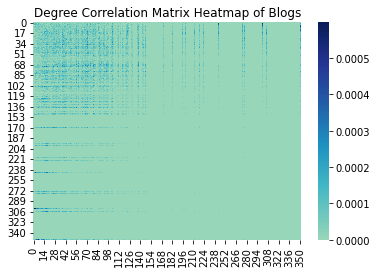

In [37]:
ax = sns.heatmap(deg_corr_mat_blogs, cmap="YlGnBu", center=0.00015)
plt.title("Degree Correlation Matrix Heatmap of Blogs")
plt.show()

# 4. Nearest neighbor degree

In [85]:
# calculates nearest neighbor degree for singe nodes
def calculate_k_nn_single_node(G, node):
    neighbors = list(G.neighbors(node))
    return np.sum([G.degree(neighbor) for neighbor in neighbors]) / G.degree(node)

In [91]:
# get k_i
k_i_network_science = []
for node in list(G_network_science.nodes):
    k_i_network_science.append(calculate_k_nn_single_node(G_network_science, node))
    
k_i_blogs = []
for node in list(G_blogs.nodes):
    k_i_blogs.append(calculate_k_nn_single_node(G_blogs, node))
    
#k_i_javax = []
#for node in list(G_javax.nodes):
#    k_i_javax.append(calculate_k_nn_single_node(G_javax, node))


In [46]:
# calculates nearest neighbor degree for all nodes of degree k
def calculate_k_nn(k, deg_corr_mat_absolute):
    neighbors = deg_corr_mat_absolute[k]
    num_neighbors = np.sum(neighbors)
    
    return np.sum([k_prime * neighbors[k_prime] / num_neighbors for k_prime in range(len(neighbors))])

In [96]:
# get k_nn
k_nn_network_science = []
for k in range(len(deg_corr_mat_network_science_absolute[0])):
    k_nn_network_science.append(calculate_k_nn(k, deg_corr_mat_network_science_absolute))
    
k_nn_blogs = []
for k in range(len(deg_corr_mat_blogs_absolute[0])):
    k_nn_blogs.append(calculate_k_nn(k, deg_corr_mat_blogs_absolute))

#k_nn_javax = []
#for k in range(len(deg_corr_mat_javax_absolute[0])):
#    k_nn_javax.append(calculate_k_nn(k, deg_corr_mat_javax_absolute))

/opt/anaconda3/envs/complexnetworkanalysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


NameError: name 'deg_corr_mat_blogs_absolute' is not defined

In [47]:
calculate_k_nn(5, deg_corr_mat_network_science_absolute)

6.381632653061225

In [86]:
calculate_k_nn_single_node(G_network_science, 7)

4.0

In [93]:
deg_corr_mat_network_science[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])